In [1]:
# Import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

C:\Users\Sony\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


# Simple Linear Regression

In [2]:
# load the data
dataset = pd.read_csv('C:/Users/Sony/Desktop/Data-Science-Training/4. Regression/Regression-PPT/Salary_Data.csv')

In [3]:
dataset.head()

YearsExperience   Salary
0              1.1  39343.0
1              1.3  46205.0
2              1.5  37731.0
3              2.0  43525.0
4              2.2  39891.0

In [4]:
dataset.tail()

YearsExperience    Salary
25              9.0  105582.0
26              9.5  116969.0
27              9.6  112635.0
28             10.3  122391.0
29             10.5  121872.0

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


#### Identify the Independent Variable and Dependent Variable

In [6]:

X = dataset.iloc[ : , 0:1] # Indepdent variable

In [7]:
y = dataset.iloc[ : , 1:2] # Dependendent Variable

In [8]:
X.shape

(30, 1)

In [9]:
y.shape

(30, 1)

#### Divide our data into Training and Testing set

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
train_test_split(X, y, test_size = 0.2, random_state = 0)

[    YearsExperience
 27              9.6
 11              4.0
 17              5.3
 22              7.9
 5               2.9
 16              5.1
 8               3.2
 14              4.5
 23              8.2
 20              6.8
 1               1.3
 29             10.5
 6               3.0
 4               2.2
 18              5.9
 19              6.0
 9               3.7
 7               3.2
 25              9.0
 3               2.0
 0               1.1
 21              7.1
 15              4.9
 12              4.0,
     YearsExperience
 2               1.5
 28             10.3
 13              4.1
 10              3.9
 26              9.5
 24              8.7,
       Salary
 27  112635.0
 11   55794.0
 17   83088.0
 22  101302.0
 5    56642.0
 16   66029.0
 8    64445.0
 14   61111.0
 23  113812.0
 20   91738.0
 1    46205.0
 29  121872.0
 6    60150.0
 4    39891.0
 18   81363.0
 19   93940.0
 9    57189.0
 7    54445.0
 25  105582.0
 3    43525.0
 0    39343.0
 21   98273.0
 15 

In [12]:
# Splitting the data 80 - 20 i.e 80% in Trainign and 20% Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [13]:
y_train

Salary
27  112635.0
11   55794.0
17   83088.0
22  101302.0
5    56642.0
16   66029.0
8    64445.0
14   61111.0
23  113812.0
20   91738.0
1    46205.0
29  121872.0
6    60150.0
4    39891.0
18   81363.0
19   93940.0
9    57189.0
7    54445.0
25  105582.0
3    43525.0
0    39343.0
21   98273.0
15   67938.0
12   56957.0

In [14]:
y_test

Salary
2    37731.0
28  122391.0
13   57081.0
10   63218.0
26  116969.0
24  109431.0

#### Feature Scaling of data
1. Normal Scaling
2. Standard Scaling

This is not required in case of Linear Regression.
My code handles this part

#### Model Building

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
regressor = LinearRegression()

##### Train my Model

In [17]:
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

##### Test the Model

In [18]:
y_pred = regressor.predict(X_test)

In [19]:
y_pred

array([[ 40748.96184072],
       [122699.62295594],
       [ 64961.65717022],
       [ 63099.14214487],
       [115249.56285456],
       [107799.50275317]])

In [20]:
y_test

Salary
2    37731.0
28  122391.0
13   57081.0
10   63218.0
26  116969.0
24  109431.0

In [21]:
y_test_copy = y_test.copy()

In [22]:
y_test_copy['y_hat'] = y_pred

In [23]:
y_test_copy

Salary          y_hat
2    37731.0   40748.961841
28  122391.0  122699.622956
13   57081.0   64961.657170
10   63218.0   63099.142145
26  116969.0  115249.562855
24  109431.0  107799.502753

###### Goodness of Fit | OLS (ordinary Least Square)

In [24]:
regressor.intercept_

array([26780.09915063])

In [25]:
regressor.coef_

array([[9312.57512673]])

In [27]:
regressor.score(X_test, y_test)

0.988169515729126

In [28]:
print("Accuracy of my prediction is ", regressor.score(X_test, y_test) * 100)

Accuracy of my prediction is  98.8169515729126


In [29]:
print("Accuracy of my Training is ", regressor.score(X_train, y_train) * 100)

Accuracy of my Training is  94.11949620562126


### Visualization of Linear Regression Model

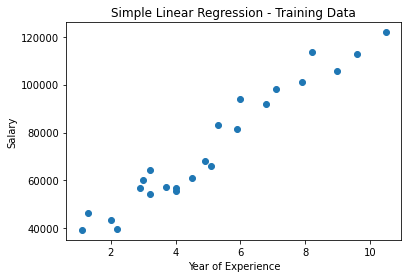

In [31]:
plt.scatter(X_train, y_train)
plt.xlabel('Year of Experience')
plt.ylabel('Salary')
plt.title("Simple Linear Regression - Training Data")
plt.show()

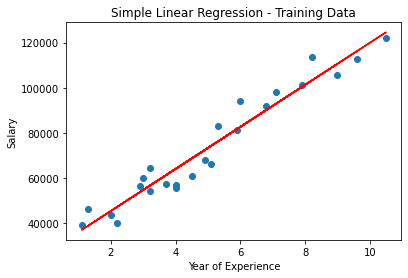

In [32]:
plt.scatter(X_train, y_train)
plt.plot(X_train, regressor.predict(X_train), color = 'red')
plt.xlabel('Year of Experience')
plt.ylabel('Salary')
plt.title("Simple Linear Regression - Training Data")
plt.show()

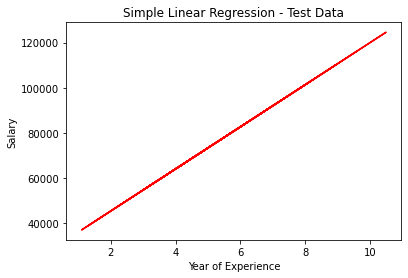

In [33]:
#plt.scatter(X_train, y_train)
plt.plot(X_train, regressor.predict(X_train), color = 'red')
plt.xlabel('Year of Experience')
plt.ylabel('Salary')
plt.title("Simple Linear Regression - Test Data")
plt.show()

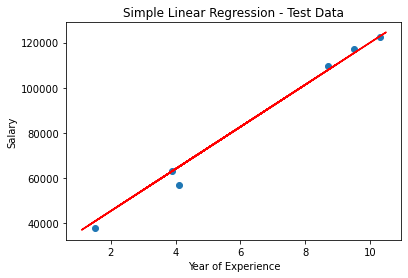

In [34]:
plt.scatter(X_test, y_test)
plt.plot(X_train, regressor.predict(X_train), color = 'red')
plt.xlabel('Year of Experience')
plt.ylabel('Salary')
plt.title("Simple Linear Regression - Test Data")
plt.show()

In [35]:
y_test_copy

Salary          y_hat
2    37731.0   40748.961841
28  122391.0  122699.622956
13   57081.0   64961.657170
10   63218.0   63099.142145
26  116969.0  115249.562855
24  109431.0  107799.502753

In [38]:
# Salary for 6 year
regressor.predict([[6]])

array([[82655.549911]])